
# Predictive Maintenance System Using Machine Learning

This notebook demonstrates the process of developing a predictive maintenance system using the **AI4I 2020 Predictive Maintenance Dataset**.

## Steps in this Notebook:
1. **Introduction and Dataset Description**
2. **Data Exploration and Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Model Training and Evaluation**
5. **Results and Insights**
6. **Reflections and Recommendations**

### Reference
- This notebook is based on methodologies covered in lectures:
  - Lecture 4: Data Preprocessing
  - Lecture 5 & 6: Supervised Learning Techniques
  - Lecture 7: Addressing Imbalanced Data
  - Lecture 8: Model Evaluation and Hyperparameter Tuning
  - Lecture 10: PCA and Dimensionality Reduction

---



## Step 1: Data Exploration and Preprocessing

### Objective:
- Load the dataset and perform basic cleaning.
- Scale features for models like Logistic Regression.

**Lecture Reference**: Lecture 4 - Data Preprocessing


In [1]:

# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'ai4i2020.csv'
dataset = pd.read_csv(file_path)

# Define features (X) and target (y)
features = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
            "Torque [Nm]", "Tool wear [min]"]
target = "Machine failure"

X = dataset[features]
y = dataset[target]

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Step 2: Exploratory Data Analysis (EDA)

### Objective:
- Visualize the distribution of features and their relationship with the target variable.

**Lecture Reference**: Lecture 2 - Data Visualization Techniques


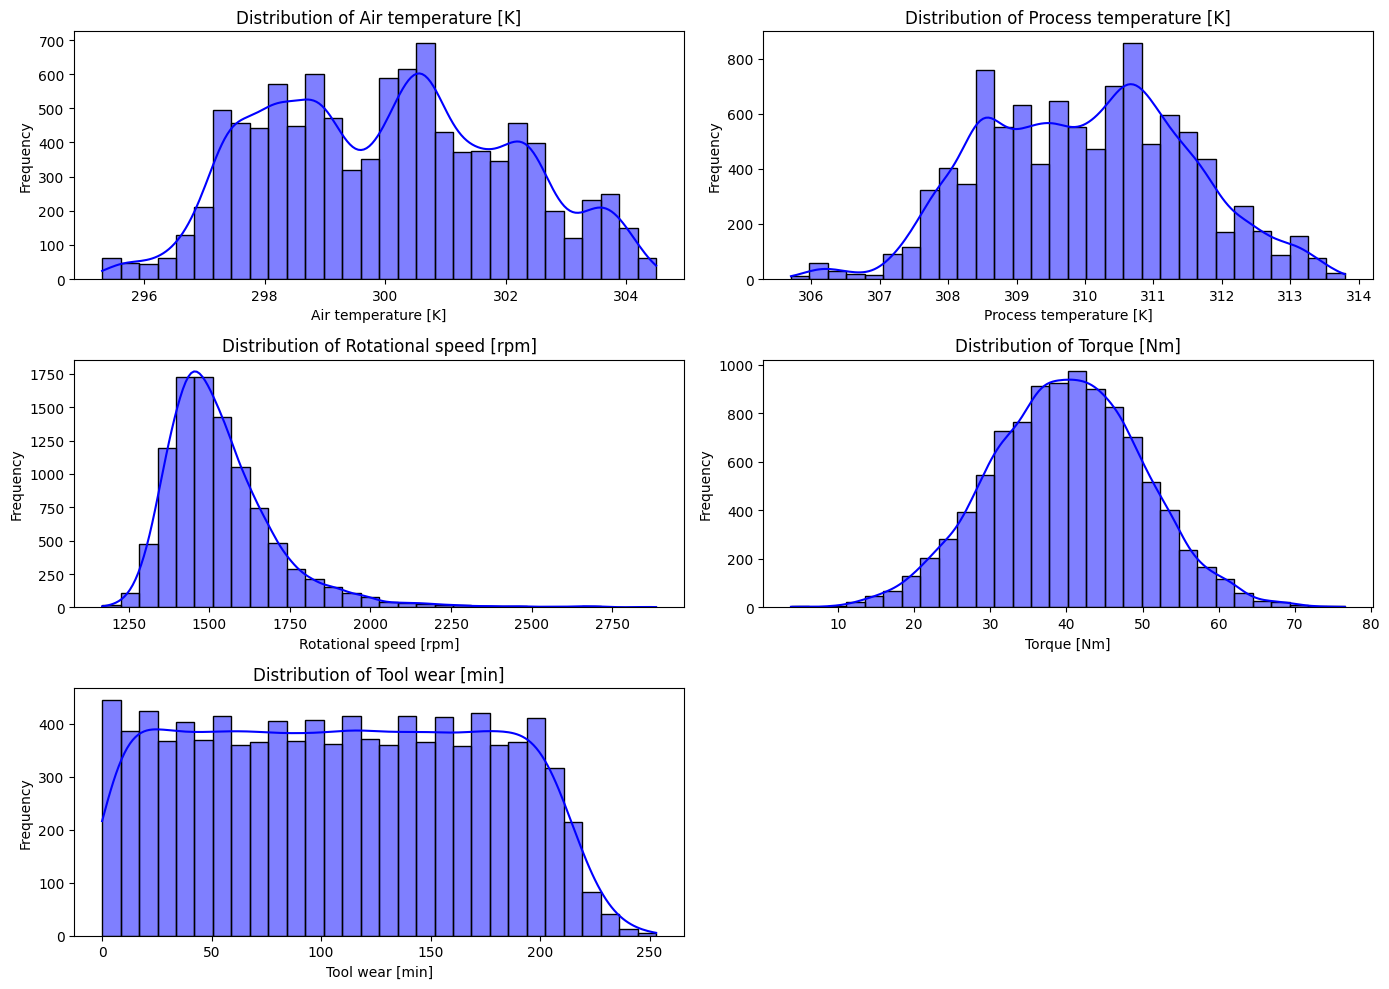

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric features
numeric_columns = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
                   "Torque [Nm]", "Tool wear [min]"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



## Step 3: Model Training and Evaluation

### Objective:
- Train two models: Logistic Regression and Random Forest.
- Evaluate their performance using accuracy, precision, recall, and ROC-AUC.

**Lecture References**:
- Lecture 5 & 6: Model Selection
- Lecture 8: Evaluation Metrics


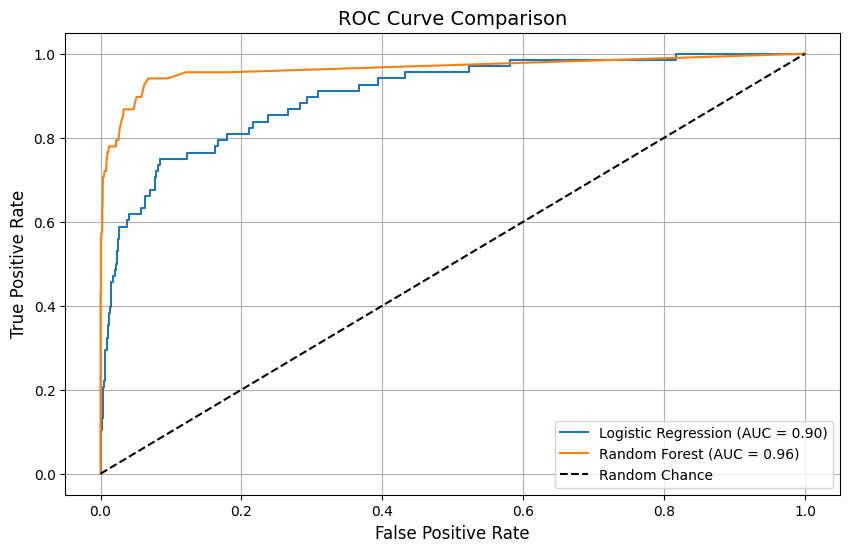

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_auc = roc_auc_score(y_test, y_pred_proba_logistic)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('ROC Curve Comparison', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid()
plt.show()



## Step 4: Results and Reflections

### Results:
- Logistic Regression struggled with the imbalanced dataset, achieving poor recall for failures.
- Random Forest performed significantly better, with a higher recall and ROC-AUC.

**Lecture References**:
- Lecture 7: Addressing Imbalanced Data
- Lecture 8: Model Evaluation and Insights

### Reflection:
- Logistic Regression's poor recall highlights the importance of considering class imbalance.
- Random Forest's ensemble approach makes it robust for predictive maintenance tasks.

---

### Recommendations:
- Deploy Random Forest for real-time predictive maintenance.
- Periodically retrain models with updated sensor data for continued accuracy.
